## Natural Language Processing - Summer Term 2023
### Hochschule Karlsruhe
### Lecturer: Prof. Dr. Jannik Strötgen
### Thanks to: Jun.-Prof. Dr. Andreas Spitz and his tutors.

# Exercise 01

### You will learn

- how to get the infrastructure up and running
- how you will complete the exercises


- about some different data formats
- how to write a simple data parser
- analyze text occurrences.

## Task 0.1 - Introduction (0 P):

- learn about global and local environments
- create a new local environment and add it to jupyter notebook
- installed the dependencies in requirements.txt for each exercise
- start jupyter notebook or jupyter-lab, switch the kernel to your environment and start solving


This assumes:
- you already have Python 3.9 installed
- you have Jupyter Notebook or Jupyterlab installed
- Python and Jupyter Notebook are already included in Anaconda, which we recommend due to the ease of installation. You can, however, also install them manually.


### Decide between local environment and global installation

When Python is installed, it is installed globally, meaning that all users and applications use the same version and, more importantly, the same version of packages (libraries). As we might have some applications that run only with a specific version of a library, it is hard and sometimes impossible to resolve version conflicts system-wide.

Therefore it is possible to create *environments*, of which you can think of as encapsulated copies of the python interpreter and a set of specific versions of packages (the idea of containerization before and during the earliest years of docker). It is customary to specify the versions in a file called `requirements.txt`, which lists the package name and the specific version, e.g., `wordcloud==1.8.1`.

**We strongly recommend creating environments to avoid global version conflicts.**

That said, nothing prevents you in principle to just install the required packages in the global namespace. We will use the latest version of packages (as listed on https://pypi.org/) and are unlikely to encounter version conflicts. We will not deduce points for using a global installation per se, but note that when version conflicts occur, this falls within your responsibility. When your submission is not executable due to this, this is obviously not helpful.

### Create an environment and make it usable in Jupyter Notebook

Using your global installation, start a terminal in the top folder where you store your exercises. Then execute the following commands in a shell:

```
# creates the environment in the folder .env
python -m venv .env            

# activate the environment
source .env/bin/activate   # for linux only
.env\Scripts\activate.bat      # for windows only

# add the jupyter kernel to the environment
pip install ipykernel

# add your environment to jupyter notebook
python -m ipykernel install --name=.env
```

### What you have now

You now have:

 - a new environment called .env in your top exercise folder
 - added the environment to the (global) jupyter notebook settings
 
 
You now can:
 
 - **configure your local environment** as you like, for example, install specific packages (**for each exercise**)
 - **start jupyter notebook globally** and change the kernel to use your local environment via Kernel->Change Kernel>.env in the top menu bar. **Then you can start to solve your exercise.**

While it would be maybe more intuitive to execute jupyter notebook *within* the environment, this is the least cumbersome way..

### Configure your environment
##### Install requirements within the environment
by typing the following command in a terminal in this directory

`source .env/bin/activate`   # windows: `.env\Scripts\activate.bat`

`pip install -r requirements.txt`  # distributed with the latest exercise

*This is also necessary when the dependencies have changed!*

### Start Jupyter Notebook (Jupyterlab) within this environment

Close this window, close the previous terminal session and type

`jupyter notebook` or `jupyter-lab`

in a new terminal.

- *Select your current exercise ipynb file*
- *Change the kernel* to use your .env via Kernel->Change Kernel>.env 

*This is required every time to start up your exercise when coding.*

## Task 0.2 - How to solve the exercises (0 P):

The upcoming exercises contain both code submission as well as written answers.

### Code-Submission

For these assignments, you complete the template code that we already provide you within this notebook. For example and exercise might look like this:

In [138]:
def square(x):
    # Assignment XY: calculate the square here and return the value
    pass

Then you are expected to complete the missing functionality. In this case, the function might look like this:

In [139]:
def square(x):
    return x*x

And to check, we can even call the function and get a result:

In [140]:
square(4)

16

### Structure your code within external python files

While you can solve all coding directly within the jupyter notebook, it is also possible to include external python files from the containing directory.

For this to work, you have to enable live edit capabilities by executing the following commands in your jupter notebook:
```
%load_ext autoreload
%autoreload 
```
Then you can include files like `util.py` by just importing them with `import util`.

**In principle, we recommend completing all your exercises within the notebook wherever possible and only include external files when strictly necessary!**

**Beware:** *If you include any extern files, please always ensure that you submit your solutions as an archive, which includes both the ipynb file and all the referenced files! Otherwise, we ***cannot*** grade them.* 

### Text-Submissions
Another type of submissions is a text submission. Here you are asked for a written answer.

*Tip*: You can use Markdown formatting if you set the cell type in the top menu bar to `Markdown`!

**To edit a cell, you can double-click it.**

For example, in the following case:

*Question*: What is Python?

\# ANSWER HERE (Double click to edit)

we expect you to write your answer in this cell (or several, if you chose to do so), like this:

Python Python is an interpreted, high-level, general-purpose programming language and commonly used in data science.

#### Markdown Support
Please use the markdown syntax to make your submission more readable!

Here are some examples:

##### Headings

*italic*

**bold**

\*literal asterisks\*

Latex code: $e^{i\pi} + 1 = 0$


Nice python styles (not for code submission!!)
```python
print "Hello World!"
```

tables

| This | is   |
|------|------|
|   a  | table|

### Include Images
If you need to include external images (not any visualizations computed inside this notebook), you can reference the file like this:


![my image 123](ex01_my_image.jpg)



![my image 123](ex01_my_image.jpg)

**Beware:** *If you include any extern files, please always ensure that you submit your solutions as an archive, which includes both the ipynb file and all the referenced files! Otherwise, we **cannot** grade them.

This concludes the short precursor, and we can start with the real exercises.

---

## Task 1 - Data Description (10P):

We provided some data files together with this assignment. These data files have a specific structure with some meta-information. Study the files and try to understand what they contain. Then try to make some sense out of this information.
Prepare a short description of the data in written form naming interesting facts (e.g., what kind of data are you seeing, how is it encoded).

Hint: It might help to read the text a little to understand what the data is all about.

#### Antwort

Es sind drei verschiedene Datensets gegeben (Debates, Reddit, TV). 

### Datenset 1: Debates
Das erste Datenset ist ein Transkript einer Debatte zwischen Trump und Clinton. Diese wird moderiert von NBC Nightly News. Die Debatte ist in drei Themenblöcke bzw. auch Runden (turns) aufgeteilt, die  wiederum in verschiedenen Dateien hinterlegt sind. In den XML-Files werden die verschiedenen Sprecher mithilfe einer Sprecher-ID (Attribut: sprecherId) und ihrem Namen (Attribut:name) unterschieden und gekennzeichnet. Die einzelnen Gesprächssequenzen haben in den Dateien zur zweiten und dritten Runde eine eindeutige ID (Attribut: id) als auch einen Zeitstempel (Attribut: timestamp). In der ersten Runde fehlen diese Attribute, die Gesprächssequenzen allerdings trotzdem gut erkennbar durch die Strukturierung mit dem Element "utterance". In jeder Datei beginnt die ID der Utterances immer wieder bei 0.

### Aufbau
Format: xml
- section -> name
- topic
- utterance -> name, sprecherId, (id, timestamp)

### Datenset 2: Reddit
Das zweite Datenset ist ein Dump-Auszug aus Reddit. Auch dort geht es um politische Diskussionen, dieses Mal in Form eines Live-Chat-Megathreads mit dem Titel "LIVE Discussion Thread for the First Presidential Debate of 2016".Das ist beispielsweise erkennbar am Element "permalink", der den Speicherort der CHatnachricht angibt. Daneben gibt es eine große Reihe an anderen Infos, wie z.B. den Nutzernamen des Author (Element: "author") und dessen Nutzer-ID (Element: "id"), sowie forenspezifische Merkmale wie die Elemente "banned", "ups" oder "score". Die eigentlichen Nachrichten liegen im Element "body".

### Aufbau
Format: json

- kind, title, 
- data: modhash, children
- children
- data: banned_by, author, id, domain, over_18, permalink, name, title, ...


### Datenset 3: TV

Das dritte Datenset besteht aus Informationen zur Berichterstattung über die Wahlkampfdiskussionen im Fernsehen. Im Material sind Inforamtionen zu den verschiedenen Sendern, Programmnamen und Diskussionszeiten zu finden. In der letzen Spalte können Transkripte ausgelesen werden.

### Aufbau
Format: csv

- debate_media
- coverage_media
- channel
- network
- location
- channel_type
- program
- coverage_time_utc
- debate_start_second
- coverage_start_second
- duration
- match_url
- transcript


expected approx. 200-500 words


## Task 2 - Data Parser Implementation (10 P):

Use the provided framework that you have now in your project. Write a reader to read in the data files and the appropriate data structures that you need in the beginning. You may only need to store things in your data structure that you will need later (e.g., lots of attributes in the reddit dump are useless for us).

Follow the instructions in the following code snippets.

In [1]:
# import the necessary library functions we prepared
from utils import create_word_cloud, read_lorem_ipsum_text

In [18]:
#
# Part 1
#
#  - Read all the files in the data directory (and subdirectories)
#
# You may use any available library here, but please add it to the requirements.txt and SUBMIT the changed file
# Create python classes to represent your data. For the beginning, the simple text body should be sufficient.
# However, if you want to add other metadata you are free to do so.
# Regard each folder as one dataset. So in Part 3, you should generate three additional word clouds.
# 
# Hint: You do _not_ need to represent the thread structure of the reddit data with your Python class instances.


#Reader XML
import os
import pathlib
from xml.etree import ElementTree

path = pathlib.Path().resolve().__str__()+'\\data\\debates'
directory = os.fsencode(path)
xmlstring = ""
for xmlfile in os.listdir(directory):
    dom = ElementTree.parse(path+"/"+xmlfile.decode("utf-8"))
    topic = dom.find("topic")
    

    utterances = topic.findall("utterance")
    for u in utterances:
        xmlstring = xmlstring + u.text + " "

xmlstring = xmlstring.replace('(APPLAUSE)', "")
#print(xmlstring)

#Reader JSON


#import json


from typing import Union


def iter_dict(iterable: Union[dict, list], key: str) -> list:
    dump = []
    if type(iterable) == list:
        for item in iterable:
            if type(item) == dict or type(item) == list:
                dump.extend(iter_dict(item, key))
    elif type(iterable) == dict:
        for dkey, value in iterable.items():
            if key == dkey:
                dump.append(iterable[key])
            if type(value) == dict or type(value) == list:
                dump.extend(iter_dict(value, key))
    return dump


#jsonfile = 'C:/Users/I518135/OneDrive - SAP SE/Master/NLP/Aufgaben bearbeitet/ex01/ex01/data/reddit/redditdump.json'

#from __future__ import print_function

#for content in jsonfile:
#    
#    for attribute, value in content.items():
#        print(attribute, value) 

#def recursive_find(data,words):
#    
#    for k,v in data.items():
#        if v == "body":
#            words=words+data[k]+" " 
#        elif isinstance(v,dict):
#            recursive_find(v,words)#
#
#jsonstring = ""        
#recursive_find(jsonfile, jsonstring)

#print(jsonfile)


# Reader CSV

import csv
import pandas as pd

path = pathlib.Path().resolve().__str__()+'\\data\\tv'
directory = os.fsencode(path)
csvstring = ""


for csvfile in os.listdir(directory):    
    output = pd.read_csv(path+"/"+csvfile.decode("utf-8"))
    list_output = list(output['transcript'].astype(str))
    string_output = ' '.join(str(i) for i in list_output)
    csvstring = csvstring + string_output + " "





In [19]:
# 
# Part 2
#
#  - Count the words in a map. Do so for each dataset.
#


# TODO - ADD YOUR OTHER COUNTER FUNCTIONS HERE
def countwords(string):
    word_count_string = {}
    words = string.split(" ")
    for word in words:
        word_count_string[word] = word_count_string.get(word, 0) + 1
    return word_count_string

word_count_xml = countwords(xmlstring)
word_count_csv = countwords(csvstring)


Debates XML:


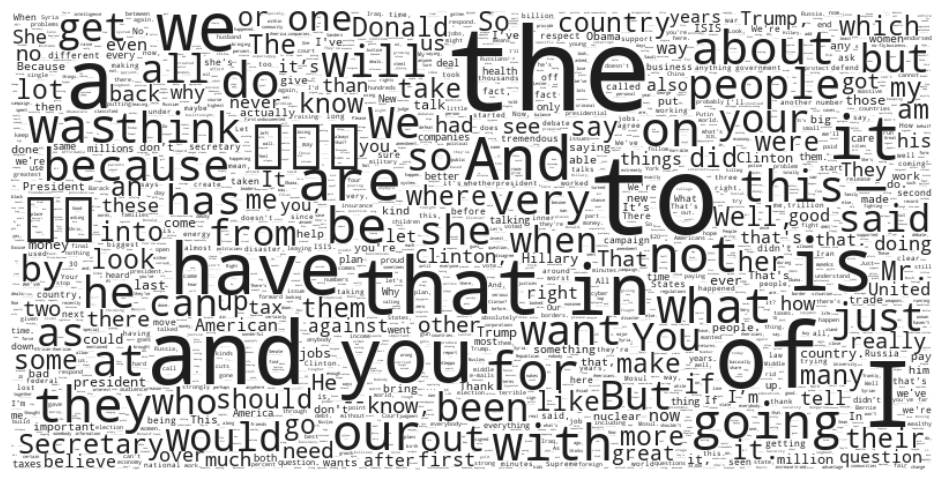

TV CSV:


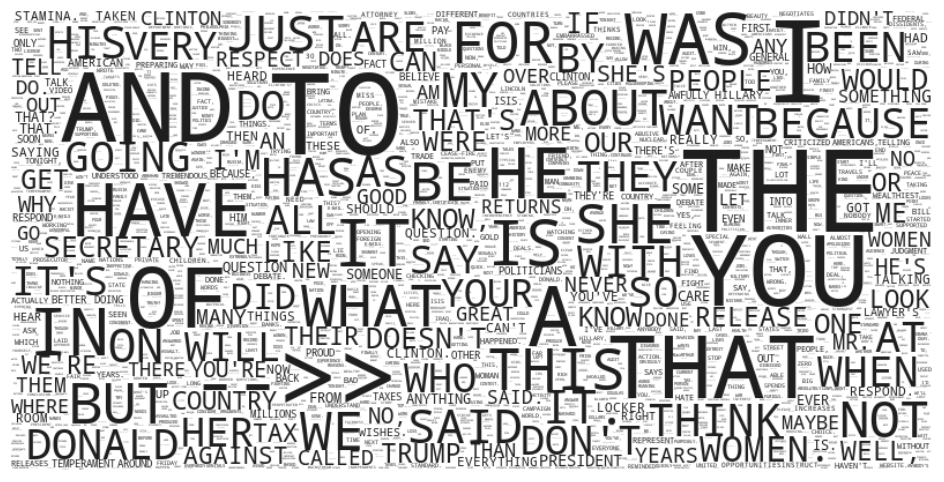

In [20]:
# 
# Part 3
#
#  - Create a word cloud for the dataset.
# 
# Example:




# TODO - CREATE THE OTHER THREE WORDCLOUDS HERE

create_word_cloud(word_count_xml, "Debates XML")
create_word_cloud(word_count_csv, "TV CSV")

## Task 3 - Word-Cloud Interpretation and Next Steps (10 P):

Interpret the word clouds you created. Can you tell any differences from the different data sets? What do you think would be the next steps to improve the word clouds?

Reference the corresponding figure and write down your interpretation.

The different datasets include different control structures depending on the dataformat which is used. The XML for example has several occurences of "(APPLAUSE)" in the transcript which I filtered out since it does not convey and meaningful information. 

The most used words are fill words that do not contain a deeper meaning in most of the cases. Words like "and", "the", "that" etc. could be filtered to focus on the more relevant pieces of information. Since these speeches are political debates some of the most used words are "I", "people" and "Secretary". Regarding the political bachground of the contestants and the situation in America at the time these speeches were hold, terms like "women" and "great" can be spottet amoung the often used words as well.

Overall it seems that these wordcoulds are a useful way to identify the essential topics and key phrases the speakers use if the words with less meaning and especially fillwords are filtered out properly.

For me it was really hard to filter the relevant content from the JSON file since the infromation is nested deeply. Iterating through the whole file and finding the relevant information would be one approach but I tried around and the solution seemed out of the timeframe that I can bring up to work on university tasks. 


#### Submitting your results:

To submit your results, please:

- save this file, i.e. `ex01_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archive and put the notebook files and all referenced files in there.
- login to ILIAS and submit the `*.ipynb` or `*.zip` archieve for the corresponding assignment.

**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel (Menu -> Kernel -> Restart & Run all).
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write the names of your partner and your name in the top section.